### Predicting the Likelihood of a Completed Purchase Using Classification model

In retail, predicting the likelihood that a customer will complete a purchase is crucial for optimizing sales strategies, managing inventory, and personalizing customer experiences. Given a dataset of product sales, customer demographics, and promotional campaigns, the task is to predict whether a transaction will result in a completed purchase (binary outcome: Yes/No). The goal is to develop classification models that estimate the probability of a customer completing their order based on various features, such as product pricing, customer demographics, and promotional offers. 

**Problem Statement**

Develop various classification models that predict the likelihood of a purchase being completed, given the customer and product features.  

The task is to predict the likelihood that a transaction will result in a completed purchase based on features such as: 

- Customer ID: A unique identifier for each customer. 

- Age: The customer's age, which could influence buying patterns. 

- Gender: The gender of the customer (Male/Female). 

- Loyalty Member: Whether the customer is a member of the loyalty program (Yes/No), which could indicate higher engagement or likelihood to complete a purchase. 

- Product Type: The category or type of product purchased (e.g., Electronics, Apparel), which might correlate with purchase completion rates. 

- SKU: Unique identifier for the product (Stock Keeping Unit). 

- Rating: The average product rating (1-5), which could influence the customer's decision to complete the purchase. 

- Order Status: Indicates whether the order was completed, pending, or canceled. For this model, the target will be whether the order was completed (Yes/No). 

- Payment Method: The method of payment used (e.g., Credit Card, PayPal), which may influence the probability of a transaction being completed. 

- Unit Price: The price per unit of the product, as higher-priced items may have lower conversion rates. 

- Quantity: The number of units purchased in the order. 

- Purchase Date: The date when the purchase was made, which might capture time-related patterns in purchase behavior. 

- Shipping Type: The shipping method chosen by the customer (e.g., Standard, Expedited), which could be linked to the likelihood of completing the order. 

- Add-ons Purchased: Whether the customer bought additional items (e.g., accessories, warranties) along with the main product (Yes/No). 

- Add-on Total: The total cost of any add-ons purchased, which contributes to the final price and may influence purchase completion. 

**The goal is to predict the probability that a customer will complete a transaction, which will be modelled as a binary outcome:** 

**Approach Overview:**

- Data Preprocessing: 

Clean the data, handling missing values, encoding categorical variables, and ensuring that only completed orders are used in the target variable. 

Create a binary target variable: 1 for completed orders, 0 for non-completed orders. 

- Feature Engineering: 

Engineer features from the raw data, such as creating binary variables for Add-ons Purchased or Loyalty Member status. 

Normalize or scale continuous features like Unit Price and Quantity if necessary. 

- Model Training: 

Split the dataset into training and testing sets. 

Train the classification models on the training data to predict the binary outcome of purchase completion. 

- Model Evaluation: 

Use metrics such as accuracy, precision, recall, and AUC-ROC to evaluate model performance. 

- Prediction: 

Use the trained classification models to predict the likelihood of purchase completion for future transactions. 

- Conclusion:  

Choose the best model based on efficiency in solving the business problem##

<a id="lib"></a>
# Import Libraries

In [301]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# %pip install pydotplus
import pydotplus
from IPython.display import Image
from sklearn.metrics import roc_auc_score

In [174]:
# set the plot size using 'rcParams'
plt.rcParams['figure.figsize'] = [15,8]

### Task 1: Load the dataset and perform preliminary EDA (Exploratory Data Analysis) with key observations and insights- (weightage - 20 marks) (AE) 

<a id="prep"></a>
### Data Preparation

#### T1.1 Load the Sales dataset. (weightage - 2 marks)

In [175]:
# load the csv file
def read_dataset (data): 
   # code starts here
  
  return pd.read_csv(path)
   # code ends here
path = "retail_sales.csv"
df_sales = read_dataset(path)
df_sales.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Order Status
0,1000,53,Male,No,Smartphone,SKU1004,2,Credit Card,5538.330000,791.190000,7,20-03-2024,Standard,"Accessory,Accessory,Accessory",40.210000,Cancelled
1,1000,53,Male,No,Tablet,SKU1002,3,Paypal,741.090000,247.030000,3,20-04-2024,Overnight,Impulse Item,26.090000,Completed
2,1002,41,Male,No,Laptop,SKU1005,3,Credit Card,1855.840000,463.960000,4,17-10-2023,Express,NaN,0.000000,Completed
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Cash,3164.760000,791.190000,4,09-08-2024,Overnight,"Impulse Item,Impulse Item",60.160000,Completed
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Cash,41.500000,20.750000,2,21-05-2024,Express,Accessory,35.560000,Completed


#### T1.2  Check the shape and data types. (weightage - 1 mark)  

In [176]:
# use 'shape' to check the dimension of data
def df_shape(df_sales):
    # code starts here 
   
    
    return df_sales.shape
    # code ends here
df_shape = df_shape(df_sales)
print(df_shape)    

(20000, 16)


<a id="dtype"></a>
#### Check the Data Type

In [177]:
# use 'dtypes' to check the data type of a variable
# use 'shape' to check the dimension of data
def df_dtypes(df_sales):
    # code starts here
    
    return df_sales.dtypes
    # code ends here
df_dtypes = df_dtypes(df_sales)
print(df_dtypes)    


Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
Order Status          object
dtype: object


#### T1.3  Remove the given variables namely, Customer ID, SKU ,Purchase Date and Unit Price (weightage - 2 marks)

In [178]:
# drop the column using drop()
def drop_columns(df_sales) : 
    cols = ['Customer ID', 'SKU','Purchase Date','Unit Price']
    # code starts here
    df_sales.drop(columns=cols)
    return df_sales.drop(columns=cols)
    # code ends here
df_sales = drop_columns(df_sales)
df_sales.head()

,Age,Gender,Loyalty Member,Product Type,Rating,Payment Method,Total Price,Quantity,Shipping Type,Add-ons Purchased,Add-on Total,Order Status
0,53,Male,No,Smartphone,2,Credit Card,5538.330000,7,Standard,"Accessory,Accessory,Accessory",40.210000,Cancelled
1,53,Male,No,Tablet,3,Paypal,741.090000,3,Overnight,Impulse Item,26.090000,Completed
2,41,Male,No,Laptop,3,Credit Card,1855.840000,4,Express,NaN,0.000000,Completed
3,41,Male,Yes,Smartphone,2,Cash,3164.760000,4,Overnight,"Impulse Item,Impulse Item",60.160000,Completed
4,75,Male,Yes,Smartphone,5,Cash,41.500000,2,Express,Accessory,35.560000,Completed


#### T1.4  Draw box plots to check for outliers for numeric variables, namely: Age, Rating, Total Price, Quantity and Add-on Total  

- Run ‘describe’ function to get the descriptive statistics of the aforementioned variables (weightage - 3 marks)

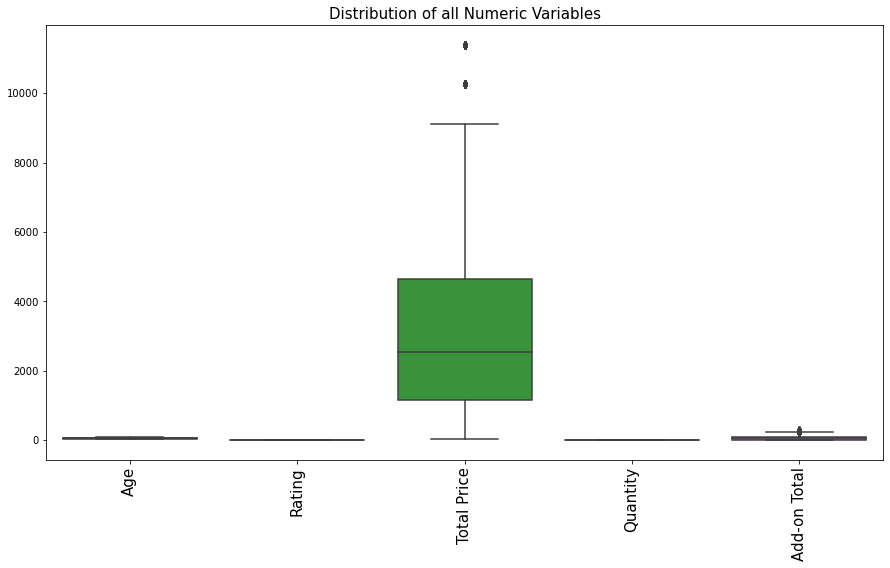

In [179]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
def outlier_treatment (df_sales) : 
    plt.figure(figsize = (15,8))

    # code starts here
    # plot a boxplot to visualize the outliers in all the numeric variables
    numeric_variables = ['Age','Rating','Total Price','Quantity','Add-on Total']
    sns.boxplot(data=df_sales[numeric_variables])
     # code ends here
    
    # set plot label
    # set text size using 'fontsize'
    plt.title('Distribution of all Numeric Variables', fontsize = 15)

    # xticks() returns the x-axis ticks
    # 'rotation = vertical' rotates the x-axis labels vertically
    plt.xticks(rotation = 'vertical', fontsize = 15)

    # display the plot
    plt.show()

outlier_treatment (df_sales)


In [180]:
def transpose_1(df_sales): 
    # code starts here
    # add transpose() method
    
    return df_sales.describe().T
    # code ends here
trans_1 = transpose_1(df_sales)
trans_1

# Observations:
# Total Price & Add-on totalare not normal due to outliers

,count,mean,std,min,25%,50%,75%,max
Age,20000.000000,48.994100,18.038745,18.000000,33.000000,49.000000,65.000000,80.000000
Rating,20000.000000,3.093950,1.223764,1.000000,2.000000,3.000000,4.000000,5.000000
Total Price,20000.000000,3180.133418,2544.978675,20.750000,1139.680000,2534.490000,4639.600000,11396.800000
Quantity,20000.000000,5.485550,2.870854,1.000000,3.000000,5.000000,8.000000,10.000000
Add-on Total,20000.000000,62.244848,58.058431,0.000000,7.615000,51.700000,93.842500,292.770000


#### T1.5  Do outlier treatment. Take lower and upper bound based on Quartiles and 1.5 times IQR and then cap the outliers with the lower bound and upper bound values. (weightage - 6 marks)

In [181]:
# Outlier treatment function
def treat_outliers_iqr(df, columns):
    """
    Treats outliers in specified columns of a DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names to treat outliers in.

    Returns:
        pd.DataFrame: The DataFrame with outliers treated.
    """
    df_treated = df.copy()

    # code starts here
    threshold = 0.5
    
    # use for loop
    for i in columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        
        iqr = q3-q1
        lower_bound = q1 - (threshold*iqr)
        upper_bound = q3 + (threshold*iqr)
        
        outliers = (df[i]<lower_bound)|(df[i]>upper_bound)
        median_value = df[i].median()
        df.loc[outliers, i] = median_value
    
    return df
    # code ends here
    
columns_to_treat = df_sales.select_dtypes(include='number').columns
df_treated = treat_outliers_iqr(df_sales, columns_to_treat)
df_treated.head()

,Age,Gender,Loyalty Member,Product Type,Rating,Payment Method,Total Price,Quantity,Shipping Type,Add-ons Purchased,Add-on Total,Order Status
0,53,Male,No,Smartphone,2,Credit Card,5538.330000,7,Standard,"Accessory,Accessory,Accessory",40.210000,Cancelled
1,53,Male,No,Tablet,3,Paypal,741.090000,3,Overnight,Impulse Item,26.090000,Completed
2,41,Male,No,Laptop,3,Credit Card,1855.840000,4,Express,NaN,0.000000,Completed
3,41,Male,Yes,Smartphone,2,Cash,3164.760000,4,Overnight,"Impulse Item,Impulse Item",60.160000,Completed
4,75,Male,Yes,Smartphone,5,Cash,41.500000,2,Express,Accessory,35.560000,Completed


#### T1.6  Run the ‘describe’ function on the treated data and note down the variables for which the ‘max’ value has now changed post the outlier treatment (weightage - 2 marks)  


In [182]:
def transpose_2(df_treated): 
    
    # code starts here
    
    
    return df_treated.describe().T

    # code ends here
trans_2 = transpose_2(df_sales)
trans_2


,count,mean,std,min,25%,50%,75%,max
Age,20000.000000,48.994100,18.038745,18.000000,33.000000,49.000000,65.000000,80.000000
Rating,20000.000000,3.093950,1.223764,1.000000,2.000000,3.000000,4.000000,5.000000
Total Price,20000.000000,2465.453786,1643.552151,20.750000,1139.680000,2534.490000,3379.320000,6329.520000
Quantity,20000.000000,5.485550,2.870854,1.000000,3.000000,5.000000,8.000000,10.000000
Add-on Total,20000.000000,46.887851,37.412310,0.000000,7.615000,51.700000,73.097500,136.910000


#### T1.7  Find the missing values. Note down the number of missing values for variable ‘Gender’ (weightage - 2 marks)

In [183]:
def missing_value (df_treated):
    # code starts here
    missing_values = df_treated.isna().sum()
    
    #  arrange sum of missing values in descending order
        
    return missing_values.sort_values(ascending=False)
    # code ends here

missing_value (df_treated)

Add-ons Purchased    4868
Gender                  1
Age                     0
Loyalty Member          0
Product Type            0
Rating                  0
Payment Method          0
Total Price             0
Quantity                0
Shipping Type           0
Add-on Total            0
Order Status            0
dtype: int64

#### T1.8  Drop the rows in which ‘Gender’ has missing values, recheck for missing values and note down the variable(s) that still has missing values (weightage - 2 marks)

In [184]:
def remove_value(df_treated):
    # code starts here
    #Removing missing value row by Gender 
    df_treated = df_treated.dropna(subset=['Gender'])
    
    # Check sum of missing values in the data (arrange in descending order)
    
    return df_treated.isna().sum().sort_values(ascending=False)
    # code ends here
    
remove_value(df_treated)

Add-ons Purchased    4867
Age                     0
Gender                  0
Loyalty Member          0
Product Type            0
Rating                  0
Payment Method          0
Total Price             0
Quantity                0
Shipping Type           0
Add-on Total            0
Order Status            0
dtype: int64

### Task 2: Carry out extensive data preparation and feature engineering (weightage - 15 marks) (ME) 

####  T2.1  Do further univariate and multivariate analysis and convert the target variable into 0 and 1. (weightage -5 marks)  


- Note: Add 'Unit Price' variable and proceed with analysis.

In [185]:
df_treated['Order Status'].value_counts()

Completed    13432
Cancelled     6568
Name: Order Status, dtype: int64

In [186]:
df_treated['Purchase Completion'] = df_treated['Order Status'].apply(lambda x: 1 if x=='Completed' else 0)

df = pd.read_csv('retail_sales.csv')
df_treated['Unit Price'] = df['Unit Price']

In [187]:
#Check correlation
df_treated.corr()

# Observation:
# Weak correlation was expected due to 1/0 nature of Purchase completion

,Age,Rating,Total Price,Quantity,Add-on Total,Purchase Completion,Unit Price
Age,1.000000,0.002949,-0.003406,0.008555,-0.007664,-0.001633,-0.004402
Rating,0.002949,1.000000,-0.274444,-0.008587,-0.020644,0.004182,-0.343829
Total Price,-0.003406,-0.274444,1.000000,0.494483,0.024242,-0.000369,0.520953
Quantity,0.008555,-0.008587,0.494483,1.000000,-0.008280,-0.001183,0.006715
Add-on Total,-0.007664,-0.020644,0.024242,-0.008280,1.000000,0.001795,0.053361
Purchase Completion,-0.001633,0.004182,-0.000369,-0.001183,0.001795,1.000000,-0.003422
Unit Price,-0.004402,-0.343829,0.520953,0.006715,0.053361,-0.003422,1.000000


In [188]:
# Need to fix Add-on purchased field
df_treated['Add-ons Purchased'] = df_treated['Add-ons Purchased'].fillna('').str.strip()

df_treated['Add-ons Purchased List'] = df_treated['Add-ons Purchased'].apply(lambda x: [i.strip() for i in x.split(',')] if x else [])
# df_treated.head()

df_exploded = df_treated[['Add-ons Purchased List']].explode('Add-ons Purchased List')
# df_exploded.head()

addon_dummies = pd.get_dummies(df_exploded['Add-ons Purchased List'], prefix='Addon')
# addon_dummies.head()

addon_encoded = addon_dummies.groupby(df_exploded.index).max()
# addon_encoded.head()

df_treated = pd.concat([df_treated.drop(columns=['Add-ons Purchased List','Add-ons Purchased']), addon_encoded], axis=1)
df_treated.head()

,Age,Gender,Loyalty Member,Product Type,Rating,Payment Method,Total Price,Quantity,Shipping Type,Add-on Total,Order Status,Purchase Completion,Unit Price,Addon_Accessory,Addon_Extended Warranty,Addon_Impulse Item
0,53,Male,No,Smartphone,2,Credit Card,5538.330000,7,Standard,40.210000,Cancelled,0,791.190000,1,0,0
1,53,Male,No,Tablet,3,Paypal,741.090000,3,Overnight,26.090000,Completed,1,247.030000,0,0,1
2,41,Male,No,Laptop,3,Credit Card,1855.840000,4,Express,0.000000,Completed,1,463.960000,0,0,0
3,41,Male,Yes,Smartphone,2,Cash,3164.760000,4,Overnight,60.160000,Completed,1,791.190000,0,0,1
4,75,Male,Yes,Smartphone,5,Cash,41.500000,2,Express,35.560000,Completed,1,20.750000,1,0,0


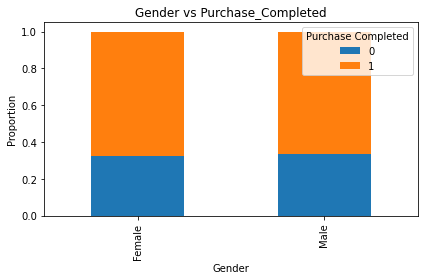

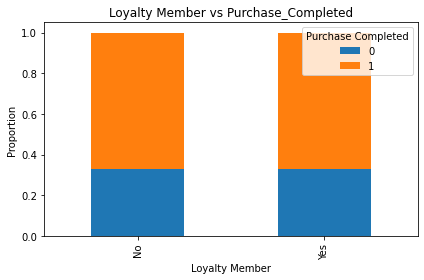

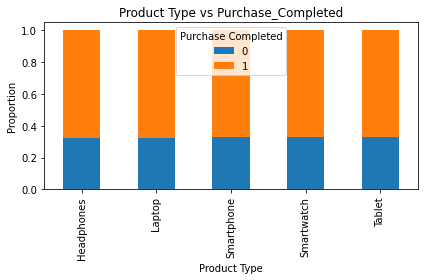

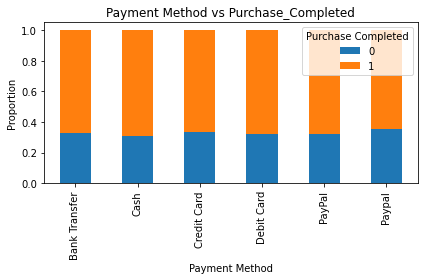

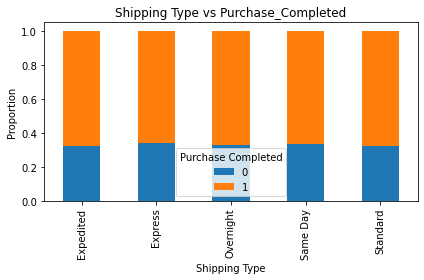

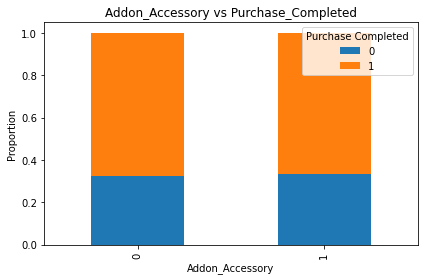

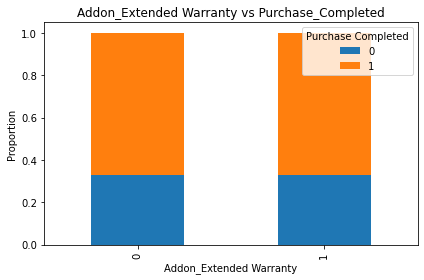

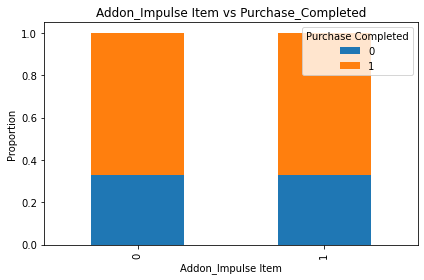

In [189]:
# Check individual contribution to Purchase completion
# Need to understand if there are any pattern

categorical_vars = ['Gender', 'Loyalty Member', 'Product Type', 'Payment Method', 'Shipping Type', 'Addon_Accessory','Addon_Extended Warranty','Addon_Impulse Item']
for col in categorical_vars:
    cross_tab = pd.crosstab(df_treated[col], df_treated['Purchase Completion'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(6, 4))
    plt.title(f'{col} vs Purchase_Completed')
    plt.ylabel('Proportion')
    plt.legend(title='Purchase Completed')
    plt.tight_layout()
    plt.show()
    
    
# Observation:
# Apparently there are none significant patterns

In [190]:
# Can we do CHi-Square test ? CHecking categorical features and purchase outcomes
# do the same t -test for numerical variables

from scipy.stats import chi2_contingency, ttest_ind

chi_square_results = []
for col in categorical_vars:
    contingency_table = pd.crosstab(df_treated[col], df_treated['Purchase Completion'])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    chi_square_results.append({'Variable': col, 'Chi2 Stat': chi2, 'p-value': p})

chi_square_df = pd.DataFrame(chi_square_results).sort_values(by='p-value')
print(chi_square_df)

numeric_vars = ['Age', 'Rating', 'Unit Price', 'Quantity', 'Total Price', 'Add-on Total']
t_test_results = []
for col in numeric_vars:
    group1 = df_treated[df_treated['Purchase Completion']==1][col]
    group0 = df_treated[df_treated['Purchase Completion']==0][col]
    t_stat, p_val = ttest_ind(group1, group0, equal_var=False)
    t_test_results.append({'Variable':col, 't-stat': t_stat, 'p-value':p_val})

t_test_df = pd.DataFrame(t_test_results).sort_values(by='p-value')

print(" ")
print(t_test_df)

                  Variable  Chi2 Stat  p-value
3           Payment Method  15.453816 0.008589
0                   Gender   1.875855 0.170806
5          Addon_Accessory   0.843376 0.358433
4            Shipping Type   3.497512 0.478257
1           Loyalty Member   0.010021 0.920262
2             Product Type   0.874450 0.928197
7       Addon_Impulse Item   0.000550 0.981293
6  Addon_Extended Warranty   0.000029 0.995672
 
       Variable    t-stat  p-value
1        Rating  0.592226 0.553709
2    Unit Price -0.484853 0.627789
5  Add-on Total  0.253626 0.799788
0           Age -0.231330 0.817062
3      Quantity -0.166999 0.867373
4   Total Price -0.052291 0.958298


#### Observation: Only payment method influence on Purchase Completion

#### T2.2  Split the dataset into train and test.  (weightage -3 marks)  

In [191]:
print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     20000 non-null  int64  
 1   Gender                  19999 non-null  object 
 2   Loyalty Member          20000 non-null  object 
 3   Product Type            20000 non-null  object 
 4   Rating                  20000 non-null  int64  
 5   Payment Method          20000 non-null  object 
 6   Total Price             20000 non-null  float64
 7   Quantity                20000 non-null  int64  
 8   Shipping Type           20000 non-null  object 
 9   Add-ons Purchased       20000 non-null  object 
 10  Add-on Total            20000 non-null  float64
 11  Order Status            20000 non-null  object 
 12  Purchase Completion     20000 non-null  int64  
 13  Unit Price              20000 non-null  float64
 14  Add-ons Purchased List  20000 non-null

In [164]:
X.head()

,Age,Gender,Loyalty Member,Product Type,Rating,Payment Method,Total Price,Quantity,Shipping Type,Add-ons Purchased,Add-on Total,Unit Price
0,53,Male,No,Smartphone,2,Credit Card,5538.330000,7,Standard,"Accessory,Accessory,Accessory",40.210000,791.190000
1,53,Male,No,Tablet,3,Paypal,741.090000,3,Overnight,Impulse Item,26.090000,247.030000
2,41,Male,No,Laptop,3,Credit Card,1855.840000,4,Express,NaN,0.000000,463.960000
3,41,Male,Yes,Smartphone,2,Cash,3164.760000,4,Overnight,"Impulse Item,Impulse Item",60.160000,791.190000
4,75,Male,Yes,Smartphone,5,Cash,41.500000,2,Express,Accessory,35.560000,20.750000


In [228]:
X = df_treated.drop(columns=['Purchase Completion','Order Status'])
y = df_treated['Purchase Completion']


# smote = SMOTE(random_state=42)
# X_oversampled, y_oversampled = smote.fit_resample(X,y)

# print(X.head(), y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### T2.3  Create dummy variables and scale the numerical features (weightage-7 marks) 


#### Label Encoding,One hot encoding and scaling


In [229]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

In [230]:
set(X_train_encoded.columns).difference(set(X_test_encoded.columns))

set()

In [231]:
scaler = StandardScaler()
X_train_encoded[numeric_vars] = scaler.fit_transform(X_train_encoded[numeric_vars])
X_test_encoded[numeric_vars] = scaler.transform(X_test_encoded[numeric_vars])

### Task 3: Build and evaluate the models (weightage - 40 marks)  (ME)

#### T3.1  Build classification models (Logistic Regression, Decision Tree, Random Forest and at least two Boosting models is the minimum) (weightage-20 marks)

In [235]:
# X_train_sm = sm.add_constant(X_train_encoded)

# Fit logistic regression using statsmodels

# Adding Smote/Oversampling to tackle imbalanced datav as in first iteration the model wasn't able to predict 0.
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_encoded, y_train)
print(y_train_oversampled.value_counts())

logreg = sm.Logit(y_train_oversampled, X_train_oversampled).fit()

# Summary output
print(logreg.summary())

1    9398
0    9398
Name: Purchase Completion, dtype: int64
Optimization terminated successfully.
         Current function value: 0.682410
         Iterations 4
                            Logit Regression Results                           
Dep. Variable:     Purchase Completion   No. Observations:                18796
Model:                           Logit   Df Residuals:                    18772
Method:                            MLE   Df Model:                           23
Date:                 Mon, 02 Jun 2025   Pseudo R-squ.:                 0.01549
Time:                         09:23:15   Log-Likelihood:                -12827.
converged:                        True   LL-Null:                       -13028.
Covariance Type:             nonrobust   LLR p-value:                 3.198e-71
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age     

In [240]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds.sort_values(by='Odds', ascending=False)

,Odds
Payment Method_Debit Card,1.711918
Payment Method_Cash,1.692854
Payment Method_PayPal,1.513184
Payment Method_Paypal,1.431311
Payment Method_Credit Card,1.402499
Loyalty Member_Yes,1.323889
Shipping Type_Same Day,1.196679
Shipping Type_Standard,1.181894
Addon_Extended Warranty,1.145345
Addon_Impulse Item,1.139140


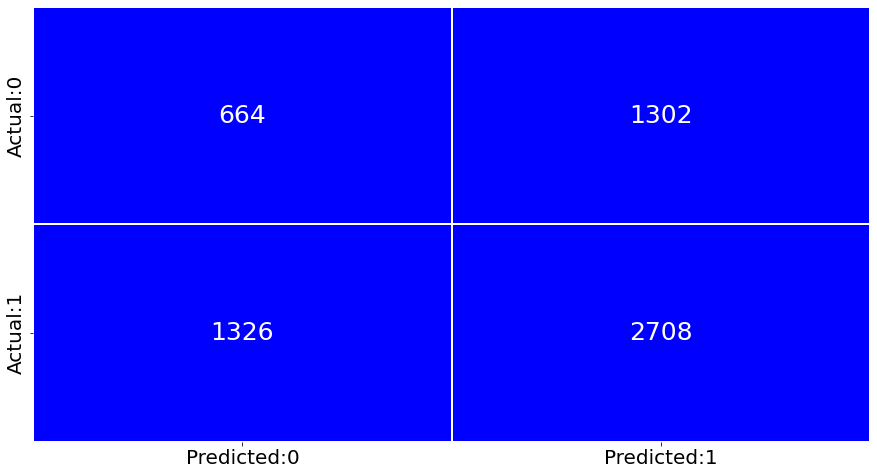

In [249]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test_encoded)

# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['blue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

plt.show()

In [250]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the precision value
precision = TP / (TP+FP)
print(f"precision: {precision}")

# calculate the recall value
recall = TP / (TP+FN)
print(f"recall: {recall}")

# calculate the specificity value
specificity = TN / (TN+FP)
print(f"specificity:{specificity}")

# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))
print(f"f1 score:{f1_score}")


# calculate various performance measures
acc_table = classification_report(y_test, y_pred)
print(acc_table)

precision: 0.6753117206982544
recall: 0.6712940009915717
specificity:0.3377416073245168
f1 score:0.6732968672302337
              precision    recall  f1-score   support

           0       0.33      0.34      0.34      1966
           1       0.68      0.67      0.67      4034

    accuracy                           0.56      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.56      0.56      0.56      6000



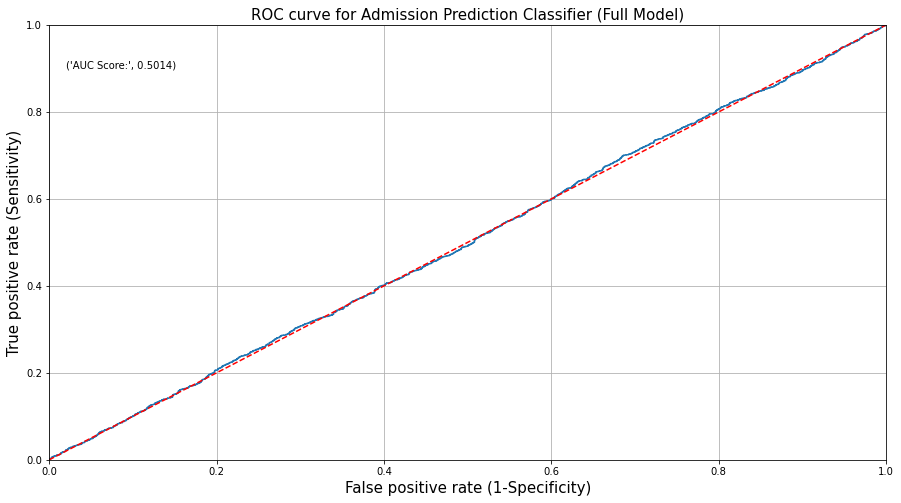

In [251]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [252]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test_encoded)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [253]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
for value in cutoff:
    update_score_card(logreg, value)

In [254]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'f1-score'])


Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.500000,0.672333,1.000000,0.672333,0.000000,0.804066
1,0.200000,0.500000,0.672333,1.000000,0.672333,0.000000,0.804066
2,0.300000,0.500000,0.672333,1.000000,0.672333,0.000000,0.804066
3,0.400000,0.501163,0.672857,0.978929,0.665833,0.003059,0.797536
4,0.500000,0.504518,0.675312,0.671294,0.562000,0.009007,0.673297
5,0.600000,0.501401,0.676867,0.137085,0.375833,0.001974,0.227994
6,0.700000,0.500752,0.704918,0.010659,0.331833,0.000991,0.021001
7,0.800000,0.500000,0.000000,0.000000,0.327667,0.000000,0.000000
8,0.900000,0.500000,0.000000,0.000000,0.327667,0.000000,0.000000


#### Observations:
1. Cut-off at 0.5 - Taking a balance of 0.67 of precision and recall.
    Recall: Captures every potential buyer and helps in early filtering and segmentation
    Precision: Can be used for follow up messaging, discounts and calls (SDRs)

In [259]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
print(youdens_table.head())


# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.495611 else 1 for x in y_pred_prob]

       TPR      FPR  Threshold  Difference
0 0.699802 0.685656   0.495611    0.014146
1 0.699058 0.685148   0.495662    0.013910
2 0.700545 0.686673   0.495551    0.013872
3 0.698066 0.684639   0.495758    0.013428
4 0.699058 0.685656   0.495655    0.013402


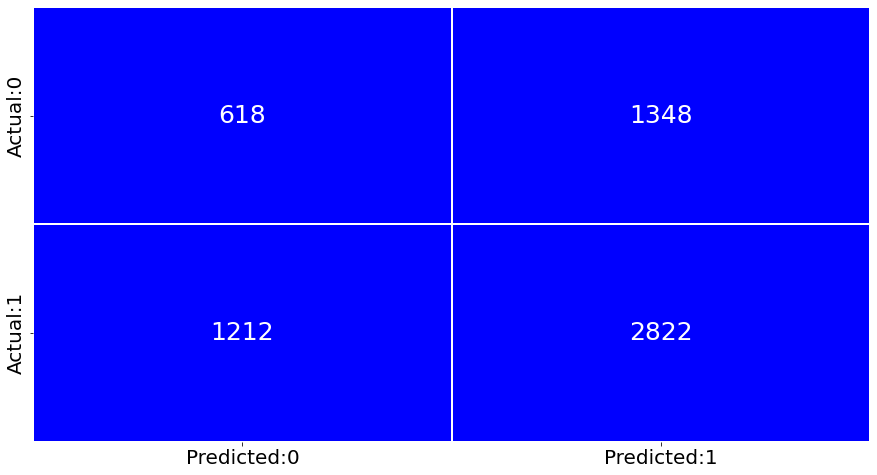

              precision    recall  f1-score   support

           0       0.34      0.31      0.33      1966
           1       0.68      0.70      0.69      4034

    accuracy                           0.57      6000
   macro avg       0.51      0.51      0.51      6000
weighted avg       0.57      0.57      0.57      6000



In [261]:
cm = confusion_matrix(y_test, y_pred_youden)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['blue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()


# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)
print(acc_table)

### Decision Tree Classifier

In [264]:
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train_oversampled)

    # return the performace measures on train set
    return (classification_report(y_train_oversampled, train_pred))
        

In [265]:
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test_encoded)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [268]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train_oversampled, y_train_oversampled)

In [269]:
# conda install graphviz

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##





==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 25.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



  environment location: C:\Users\arpit\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.6.2                |       hd77b12b_0         260 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libffi-3.4.4               |       hd77b12b_1         122 KB
    libgd-2.3.3                |       ha43c60c_1         314 KB
    pango-1.50.7               |       h78c2152_


(process:18536): GLib-GIO-WARNING **: 10:19:00.291: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.1126.101_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs

(process:18536): GLib-GIO-WARNING **: 10:19:01.042: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2503.29.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:18536): GLib-GIO-WARNING **: 10:19:01.557: Unexpectedly, UWP app `Clipchamp.Clipchamp_4.2.10220.0_x64__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.119877 to fit



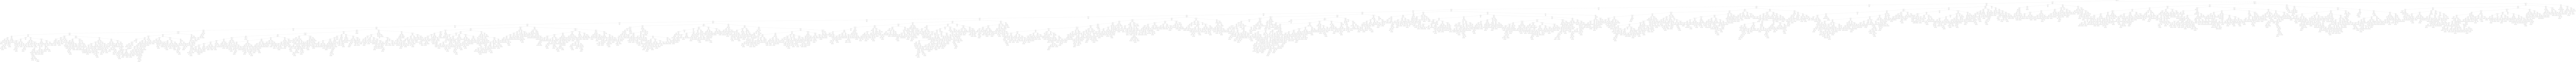

In [270]:
# # save the column names in 'labels'
# labels = X_train_oversampled.columns

# # export a decision tree in DOT format
# # pass the 'decision_tree' to export it to Graphviz
# # pass the column names to 'feature_names'
# # pass the required class labels to 'class_names'
# dot_data = tree.export_graphviz(decision_tree, feature_names = labels, class_names = ["0","1"])  

# # plot the decision tree using DOT format in 'dot_data'
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # display the decision tree
# Image(graph.create_png())

# # double-click on the image below to get an expanded view

In [271]:
train_report = get_train_report(decision_tree)

print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9398
           1       1.00      1.00      1.00      9398

    accuracy                           1.00     18796
   macro avg       1.00      1.00      1.00     18796
weighted avg       1.00      1.00      1.00     18796



In [272]:
test_report = get_test_report(decision_tree)

print(test_report)

# Clear case of overfitting. Let's do grid search CV to tune hyperparameter


              precision    recall  f1-score   support

           0       0.33      0.38      0.35      1966
           1       0.68      0.63      0.65      4034

    accuracy                           0.55      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.56      0.55      0.56      6000



###### Clear case of overfitting. Let's do grid search CV to tune hyperparameter


In [273]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_train_oversampled, y_train_oversampled)
tree_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [274]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train_oversampled, y_train_oversampled)

In [275]:
print('Classification Report for train set: \n', get_train_report(dt_model))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.55      0.53      0.54      9398
           1       0.55      0.57      0.56      9398

    accuracy                           0.55     18796
   macro avg       0.55      0.55      0.55     18796
weighted avg       0.55      0.55      0.55     18796



In [276]:
print('Classification Report for test set: \n', get_test_report(dt_model))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.33      0.44      0.38      1966
           1       0.68      0.57      0.62      4034

    accuracy                           0.53      6000
   macro avg       0.51      0.51      0.50      6000
weighted avg       0.56      0.53      0.54      6000



### Random Forest for Classification

In [277]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train_oversampled, y_train_oversampled)

In [278]:
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9398
           1       0.99      0.98      0.99      9398

    accuracy                           0.99     18796
   macro avg       0.99      0.99      0.99     18796
weighted avg       0.99      0.99      0.99     18796



In [279]:
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.32      0.39      0.35      1966
           1       0.67      0.59      0.63      4034

    accuracy                           0.53      6000
   macro avg       0.49      0.49      0.49      6000
weighted avg       0.55      0.53      0.54      6000



In [284]:
tuned_paramaters = [{
    'criterion': ['entropy', 'gini'],
    'n_estimators': [10, 30, 50],
    'max_depth': [2,3,4,5],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 3 ],
    'min_samples_leaf': [1, 2],
    'max_leaf_nodes': [2, 5, 8]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train_oversampled, y_train_oversampled)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50} 



In [286]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train_oversampled, y_train_oversampled)

# print the performance measures for test set for the model with best parameters
print('Classification Report for train set:\n', get_train_report(rf_model))
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for train set:
               precision    recall  f1-score   support

           0       0.59      0.62      0.61      9398
           1       0.60      0.56      0.58      9398

    accuracy                           0.59     18796
   macro avg       0.59      0.59      0.59     18796
weighted avg       0.59      0.59      0.59     18796

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.32      0.43      0.37      1966
           1       0.67      0.57      0.61      4034

    accuracy                           0.52      6000
   macro avg       0.50      0.50      0.49      6000
weighted avg       0.56      0.52      0.53      6000



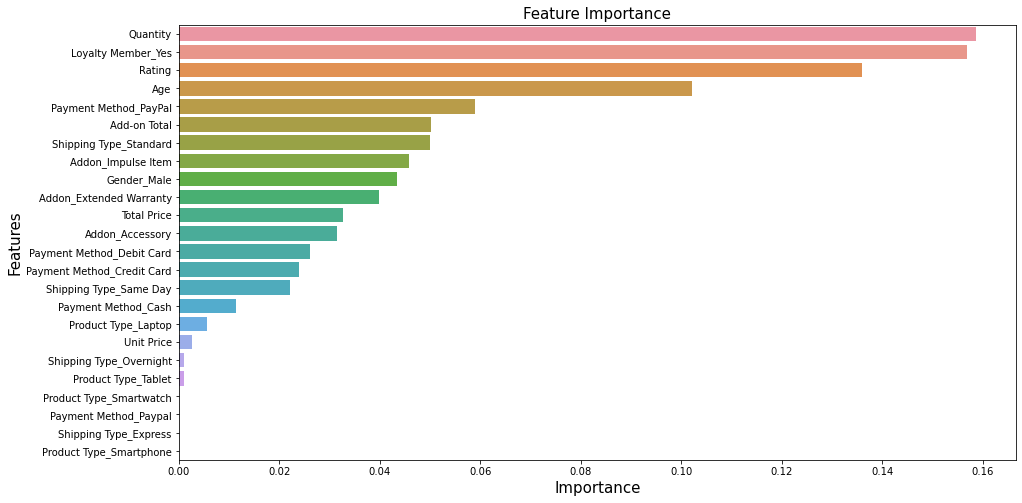

In [287]:
    # create a dataframe that stores the feature names and their importance
    # 'feature_importances_' returns the features based on the gini importance
    important_features = pd.DataFrame({'Features': X_train_oversampled.columns, 
                                       'Importance': rf_model.feature_importances_})

    # sort the dataframe in the descending order according to the feature importance
    important_features = important_features.sort_values('Importance', ascending = False)

    important_features

    # create a barplot to visualize the features based on their importance
    sns.barplot(x = 'Importance', y = 'Features', data = important_features)

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('Feature Importance', fontsize = 15)
    plt.xlabel('Importance', fontsize = 15)
    plt.ylabel('Features', fontsize = 15)

    plt.show()

### Xgboost

In [290]:
# pip install xgboost
from xgboost import XGBClassifier

In [295]:
X_train_oversampled.head()

,Age,Rating,Total Price,Quantity,Add-on Total,Unit Price,Addon_Accessory,Addon_Extended Warranty,Addon_Impulse Item,Gender_Male,Loyalty Member_Yes,Product Type_Laptop,Product Type_Smartphone,Product Type_Smartwatch,Product Type_Tablet,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Paypal,Shipping Type_Express,Shipping Type_Overnight,Shipping Type_Same Day,Shipping Type_Standard
0,-1.605231,1.558047,0.181018,0.184923,0.126342,-0.379000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.334190,-0.080278,1.968509,-0.163144,0.197200,1.792855,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,1.054546,1.558047,0.583340,-0.859279,0.126342,1.792855,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,-1.272759,-0.899440,-0.656697,-0.859279,0.159623,-0.379000,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0.666662,0.738884,-0.801828,-1.555414,-1.261297,1.792855,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [291]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train_oversampled, y_train_oversampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [302]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test_encoded)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test_encoded)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

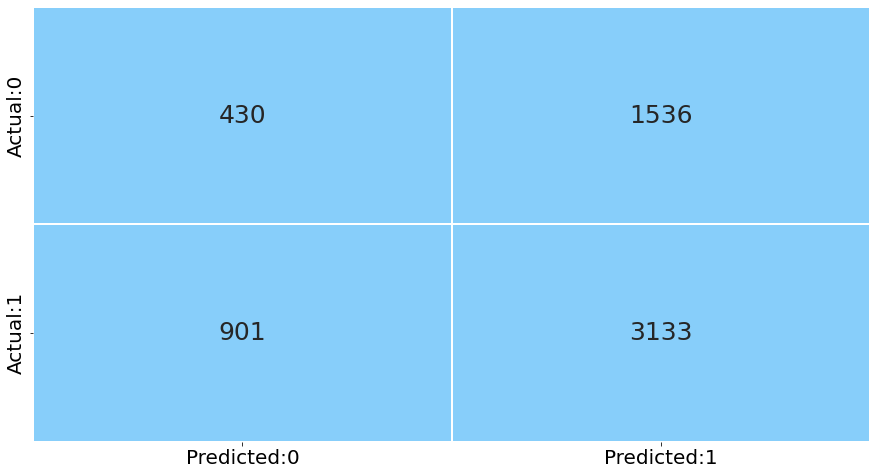

              precision    recall  f1-score   support

           0       0.32      0.22      0.26      1966
           1       0.67      0.78      0.72      4034

    accuracy                           0.59      6000
   macro avg       0.50      0.50      0.49      6000
weighted avg       0.56      0.59      0.57      6000



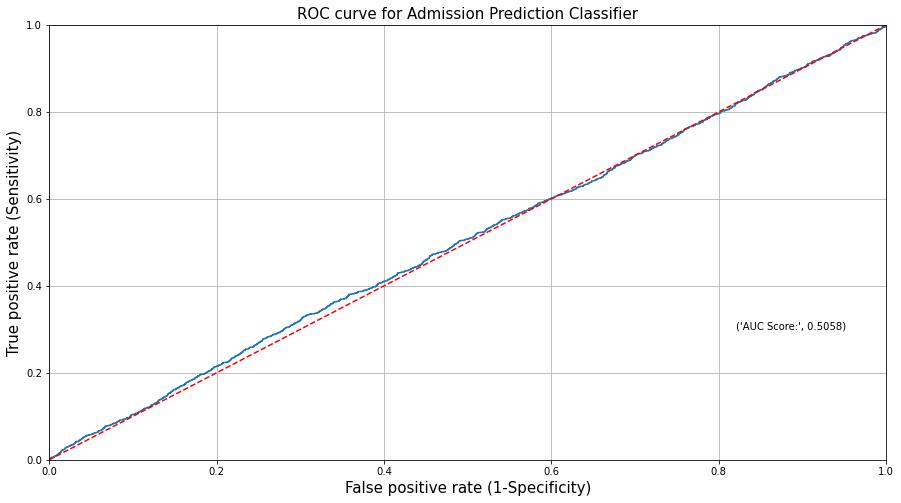

In [303]:
# call the function to plot the confusion matrix
# pass the XGBoost model to the function
plot_confusion_matrix(xgb_model)

# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

# call the function to plot the ROC curve
# pass the XGBoost model to the function
plot_roc(xgb_model)

In [304]:
# create a dictionary with hyperparameters and its values
# learning_rate: pass the list of boosting learning rates
# max_depth: pass the range of values as the maximum tree depth for base learners
# gamma: pass the list of minimum loss reduction values required to make a further partition on a leaf node of the tree
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train_oversampled, y_train_oversampled)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')


Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9} 



Classification Report for test set:
               precision    recall  f1-score   support

           0       0.34      0.17      0.23      1966
           1       0.67      0.84      0.75      4034

    accuracy                           0.62      6000
   macro avg       0.51      0.50      0.49      6000
weighted avg       0.56      0.62      0.58      6000



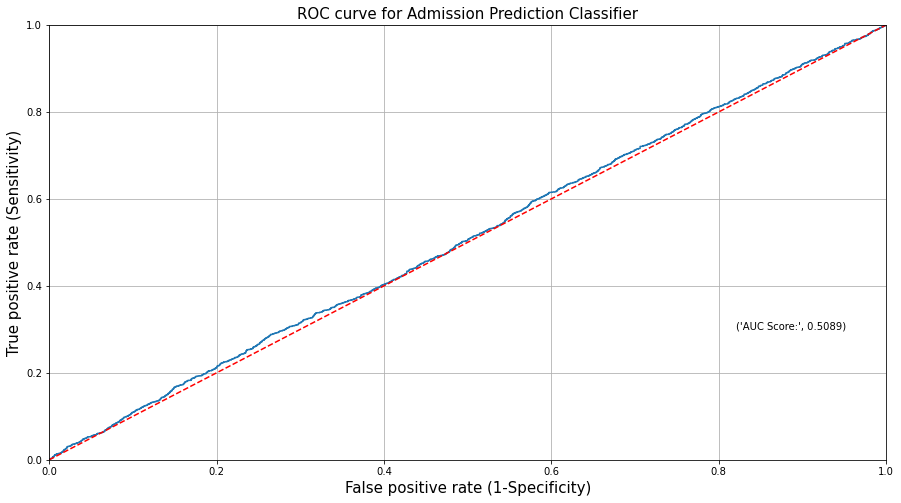

In [306]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                                max_depth = xgb_grid.best_params_.get('max_depth'),
                                gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(X_train_oversampled, y_train_oversampled)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(xgb_model))
pred = xgb_model.predict(X_test_encoded)

plot_roc(xgb_model)

In [308]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.34      0.17      0.23      1966\n           1       0.67      0.84      0.75      4034\n\n    accuracy                           0.62      6000\n   macro avg       0.51      0.50      0.49      6000\nweighted avg       0.56      0.62      0.58      6000\n'

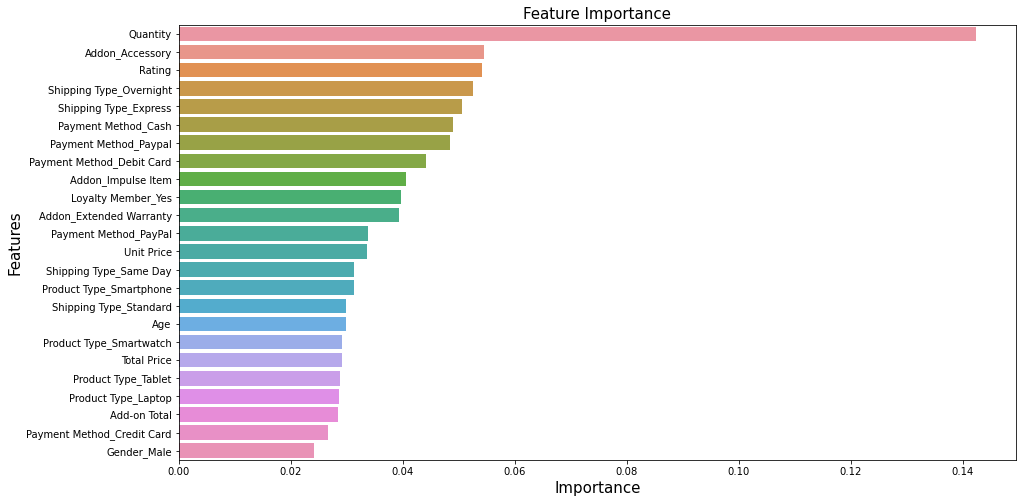

,Features,Importance
3,Quantity,0.142283
6,Addon_Accessory,0.054540
1,Rating,0.054113
21,Shipping Type_Overnight,0.052558
20,Shipping Type_Express,0.050553
15,Payment Method_Cash,0.049047
19,Payment Method_Paypal,0.048503
17,Payment Method_Debit Card,0.044147
8,Addon_Impulse Item,0.040526
10,Loyalty Member_Yes,0.039700


In [310]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X_train_oversampled.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()
important_features

#### T3.2  Check for the model evaluation parameters and do fine-tuning when necessary to make models free of errors (weightage-20 marks)

### Task 4: Summarize the findings of the analysis and draw conclusions with PPT / PDF. (weightage - 25 marks) (ME)   

#### Final Submission guidelines:    

- Download the Jupyter notebook in the format of html.    

- Upload it in the lumen (UNext LMS)   

- Summarized PPT/ PDF prepared in Task 4 to be uploaded in the lumen (UNext LMS) and it must contain why and how the best model was selected. 